## 1. Data Preparation

In [1]:
import yfinance as yf
from pytickersymbols import PyTickerSymbols

stock_data = PyTickerSymbols()
indices = stock_data.get_all_indices()
indices

['TECDAX',
 'BEL 20',
 'AEX',
 'EURO STOXX 50',
 'IBEX 35',
 'S&P 100',
 'MOEX',
 'SDAX',
 'CAC 40',
 'NASDAQ 100',
 'OMX Stockholm 30',
 'FTSE 100',
 'CDAX',
 'S&P 600',
 'MDAX',
 'Switzerland 20',
 'DAX',
 'OMX Helsinki 25',
 'DOW JONES',
 'CAC Mid 60',
 'S&P 500']

We choose the following indices that also appear in the paper and is available to get all constituent tickers through the above package for ease of data downloading: NASDAQ 100, FTSE 100, CAC 40, DAX.

In [3]:
# Check methods for getting relevant index tickers data (for purposes of using them to download from yahoo finance)
list(filter(lambda x: x.endswith('_nyc_yahoo_tickers'), dir(stock_data)))

['get_aex_nyc_yahoo_tickers',
 'get_bel_20_nyc_yahoo_tickers',
 'get_cac_40_nyc_yahoo_tickers',
 'get_cac_mid_60_nyc_yahoo_tickers',
 'get_cdax_nyc_yahoo_tickers',
 'get_dax_nyc_yahoo_tickers',
 'get_dow_jones_nyc_yahoo_tickers',
 'get_euro_stoxx_50_nyc_yahoo_tickers',
 'get_ftse_100_nyc_yahoo_tickers',
 'get_ibex_35_nyc_yahoo_tickers',
 'get_mdax_nyc_yahoo_tickers',
 'get_moex_nyc_yahoo_tickers',
 'get_nasdaq_100_nyc_yahoo_tickers',
 'get_omx_helsinki_25_nyc_yahoo_tickers',
 'get_omx_stockholm_30_nyc_yahoo_tickers',
 'get_sdax_nyc_yahoo_tickers',
 'get_sp_100_nyc_yahoo_tickers',
 'get_sp_500_nyc_yahoo_tickers',
 'get_sp_600_nyc_yahoo_tickers',
 'get_switzerland_20_nyc_yahoo_tickers',
 'get_tecdax_nyc_yahoo_tickers']

In [4]:
# Retrieve ticker symbols (for yahoo finance) from above methods
indices = {
    'NASDAQ 100': stock_data.get_nasdaq_100_nyc_yahoo_tickers(),
    'FTSE 100': stock_data.get_ftse_100_nyc_yahoo_tickers(),
    'CAC 40': stock_data.get_cac_40_nyc_yahoo_tickers(),
    'DAX': stock_data.get_dax_nyc_yahoo_tickers()
}

indices

{'NASDAQ 100': ['AZN',
  'AZNCF',
  'AAPL',
  'CSCO',
  'INTC',
  'MSFT',
  'WBA',
  'ATVI',
  'ADBE',
  'GOOGL',
  'GOOG',
  'AMZN',
  'AMGN',
  'ADI',
  'AMAT',
  'ADSK',
  'ADP',
  'BIDU',
  'BAIDF',
  'BIIB',
  'CHTR',
  'CTSH',
  'CMCSA',
  'COST',
  'CSX',
  'DLTR',
  'EBAY',
  'EA',
  'FAST',
  'FISV',
  'GILD',
  'ILMN',
  'INTU',
  'ISRG',
  'JD',
  'JDCMF',
  'KHC',
  'LRCX',
  'MAR',
  '0P0000KQL0',
  '0P0001I1JH',
  'MCHP',
  'MU',
  'MDLZ',
  'MNST',
  'NTES',
  'NETTF',
  'NFLX',
  'NVDA',
  'NXPI',
  'ORLY',
  'PCAR',
  'PAYX',
  'PYPL',
  'QCOM',
  'REGN',
  'ROST',
  'SIRI',
  'SWKS',
  'SBUX',
  'TMUS',
  'TSLA',
  'TXN',
  'VRSK',
  'VRTX',
  'BKNG',
  'EXC',
  'HON',
  'AMD',
  'ALGN',
  'AEP',
  'ANSS',
  'AVGO',
  'CDNS',
  'CTAS',
  'STZ',
  'CEG',
  'CPRT',
  'FTNT',
  'IDXX',
  'KLAC',
  'SNPS',
  'VRSN',
  'ASMLF',
  'ASML',
  'DXCM',
  'ODFL',
  'PEP',
  'XEL',
  'TEAM',
  'DOCU',
  'KDP',
  'LULU',
  'MRVL',
  'MTCH',
  'MELI',
  'MRNA',
  'OKTA',
  'PDD',
 

In [5]:
# Collect daily price data
from tqdm import tqdm

start_date, end_date = '2000-01-01', '2018-08-16' # same as denoted in the paper

data = {
    'NASDAQ 100': {},
    'FTSE 100': {},
    'CAC 40': {},
    'DAX': {}
}

for index in indices:
    print(index)
    for ticker in tqdm(indices[index]):
        
        try:
            data[index][ticker] = yf.download(ticker, start=start_date, end=end_date)[['Adj Close']]
        except Exception as e:
            continue
            
data

NASDAQ 100


  0%|          | 0/110 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed

  1%|          | 1/110 [00:02<03:52,  2.13s/it]


[*********************100%***********************]  1 of 1 completed

  2%|▏         | 2/110 [00:03<02:57,  1.64s/it]


[*********************100%***********************]  1 of 1 completed

  3%|▎         | 3/110 [00:05<03:03,  1.72s/it]


[*********************100%***********************]  1 of 1 completed

  4%|▎         | 4/110 [00:06<02:57,  1.67s/it]


[*********************100%***********************]  1 of 1 completed

  5%|▍         | 5/110 [00:08<02:54,  1.66s/it]


[*********************100%***********************]  1 of 1 completed

  5%|▌         | 6/110 [00:10<02:51,  1.65s/it]


[*********************100%***********************]  1 of 1 completed

  6%|▋         | 7/110 [00:11<02:48,  1.63s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
  7%|▋         | 8/110 [00:12<02:19,  1.37s/it]


[*********************100%***********************]  1 of 1 completed

  8%|▊         | 9/110 [00:14<02:26,  1.45s/it]


[*********************100%***********************]  1 of 1 completed

  9%|▉         | 10/110 [00:15<02:29,  1.49s/it]


[*********************100%***********************]  1 of 1 completed

 10%|█         | 11/110 [00:17<02:31,  1.53s/it]


[*********************100%***********************]  1 of 1 completed

 11%|█         | 12/110 [00:18<02:30,  1.54s/it]


[*********************100%***********************]  1 of 1 completed

 12%|█▏        | 13/110 [00:20<02:30,  1.55s/it]


[*********************100%***********************]  1 of 1 completed

 13%|█▎        | 14/110 [00:22<02:31,  1.58s/it]


[*********************100%***********************]  1 of 1 completed

 14%|█▎        | 15/110 [00:23<02:31,  1.59s/it]


[*********************100%***********************]  1 of 1 completed

 15%|█▍        | 16/110 [00:25<02:31,  1.61s/it]


[*********************100%***********************]  1 of 1 completed

 15%|█▌        | 17/110 [00:27<02:31,  1.63s/it]


[*********************100%***********************]  1 of 1 completed

 16%|█▋        | 18/110 [00:28<02:26,  1.59s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['BAIDF']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 17%|█▋        | 19/110 [00:29<02:03,  1.36s/it]


[*********************100%***********************]  1 of 1 completed

 18%|█▊        | 20/110 [00:30<02:08,  1.42s/it]


[*********************100%***********************]  1 of 1 completed

 19%|█▉        | 21/110 [00:32<02:03,  1.39s/it]


[*********************100%***********************]  1 of 1 completed

 20%|██        | 22/110 [00:33<02:08,  1.46s/it]


[*********************100%***********************]  1 of 1 completed

 21%|██        | 23/110 [00:35<02:11,  1.51s/it]


[*********************100%***********************]  1 of 1 completed

 22%|██▏       | 24/110 [00:37<02:13,  1.55s/it]


[*********************100%***********************]  1 of 1 completed

 23%|██▎       | 25/110 [00:39<02:20,  1.66s/it]


[*********************100%***********************]  1 of 1 completed

 24%|██▎       | 26/110 [00:40<02:19,  1.66s/it]


[*********************100%***********************]  1 of 1 completed

 25%|██▍       | 27/110 [00:42<02:16,  1.64s/it]


[*********************100%***********************]  1 of 1 completed

 25%|██▌       | 28/110 [00:43<02:13,  1.63s/it]


[*********************100%***********************]  1 of 1 completed

 26%|██▋       | 29/110 [00:45<02:12,  1.64s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['FISV']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 27%|██▋       | 30/110 [00:46<01:50,  1.38s/it]


[*********************100%***********************]  1 of 1 completed

 28%|██▊       | 31/110 [00:47<01:53,  1.44s/it]


[*********************100%***********************]  1 of 1 completed

 29%|██▉       | 32/110 [00:49<01:56,  1.49s/it]


[*********************100%***********************]  1 of 1 completed

 30%|███       | 33/110 [00:51<01:59,  1.55s/it]


[*********************100%***********************]  1 of 1 completed

 31%|███       | 34/110 [00:52<01:59,  1.57s/it]


[*********************100%***********************]  1 of 1 completed

 32%|███▏      | 35/110 [00:54<01:50,  1.47s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['JDCMF']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 33%|███▎      | 36/110 [00:54<01:33,  1.27s/it]


[*********************100%***********************]  1 of 1 completed

 34%|███▎      | 37/110 [00:55<01:28,  1.21s/it]


[*********************100%***********************]  1 of 1 completed

 35%|███▍      | 38/110 [00:57<01:36,  1.35s/it]


[*********************100%***********************]  1 of 1 completed

 35%|███▌      | 39/110 [00:59<01:41,  1.42s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['0P0000KQL0']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 36%|███▋      | 40/110 [01:00<01:25,  1.22s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['0P0001I1JH']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 37%|███▋      | 41/110 [01:00<01:14,  1.08s/it]


[*********************100%***********************]  1 of 1 completed

 38%|███▊      | 42/110 [01:02<01:24,  1.25s/it]


[*********************100%***********************]  1 of 1 completed

 39%|███▉      | 43/110 [01:04<01:31,  1.37s/it]


[*********************100%***********************]  1 of 1 completed

 40%|████      | 44/110 [01:05<01:34,  1.44s/it]


[*********************100%***********************]  1 of 1 completed

 41%|████      | 45/110 [01:07<01:36,  1.49s/it]


[*********************100%***********************]  1 of 1 completed

 42%|████▏     | 46/110 [01:08<01:37,  1.53s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['NETTF']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 43%|████▎     | 47/110 [01:09<01:22,  1.30s/it]


[*********************100%***********************]  1 of 1 completed

 44%|████▎     | 48/110 [01:11<01:25,  1.39s/it]


[*********************100%***********************]  1 of 1 completed

 45%|████▍     | 49/110 [01:12<01:29,  1.47s/it]


[*********************100%***********************]  1 of 1 completed

 45%|████▌     | 50/110 [01:14<01:26,  1.44s/it]


[*********************100%***********************]  1 of 1 completed

 46%|████▋     | 51/110 [01:15<01:29,  1.51s/it]


[*********************100%***********************]  1 of 1 completed

 47%|████▋     | 52/110 [01:17<01:31,  1.58s/it]


[*********************100%***********************]  1 of 1 completed

 48%|████▊     | 53/110 [01:19<01:31,  1.60s/it]


[*********************100%***********************]  1 of 1 completed

 49%|████▉     | 54/110 [01:20<01:20,  1.44s/it]


[*********************100%***********************]  1 of 1 completed

 50%|█████     | 55/110 [01:22<01:22,  1.50s/it]


[*********************100%***********************]  1 of 1 completed

 51%|█████     | 56/110 [01:23<01:22,  1.52s/it]


[*********************100%***********************]  1 of 1 completed

 52%|█████▏    | 57/110 [01:25<01:24,  1.59s/it]


[*********************100%***********************]  1 of 1 completed

 53%|█████▎    | 58/110 [01:26<01:21,  1.57s/it]


[*********************100%***********************]  1 of 1 completed

 54%|█████▎    | 59/110 [01:28<01:21,  1.59s/it]


[*********************100%***********************]  1 of 1 completed

 55%|█████▍    | 60/110 [01:30<01:22,  1.64s/it]


[*********************100%***********************]  1 of 1 completed

 55%|█████▌    | 61/110 [01:31<01:16,  1.57s/it]


[*********************100%***********************]  1 of 1 completed

 56%|█████▋    | 62/110 [01:32<01:11,  1.49s/it]


[*********************100%***********************]  1 of 1 completed

 57%|█████▋    | 63/110 [01:34<01:13,  1.56s/it]


[*********************100%***********************]  1 of 1 completed

 58%|█████▊    | 64/110 [01:36<01:11,  1.55s/it]


[*********************100%***********************]  1 of 1 completed

 59%|█████▉    | 65/110 [01:37<01:09,  1.55s/it]


[*********************100%***********************]  1 of 1 completed

 60%|██████    | 66/110 [01:39<01:12,  1.64s/it]


[*********************100%***********************]  1 of 1 completed

 61%|██████    | 67/110 [01:41<01:11,  1.67s/it]


[*********************100%***********************]  1 of 1 completed

 62%|██████▏   | 68/110 [01:43<01:11,  1.71s/it]


[*********************100%***********************]  1 of 1 completed

 63%|██████▎   | 69/110 [01:44<01:08,  1.67s/it]


[*********************100%***********************]  1 of 1 completed

 64%|██████▎   | 70/110 [01:46<01:05,  1.64s/it]


[*********************100%***********************]  1 of 1 completed

 65%|██████▍   | 71/110 [01:48<01:04,  1.66s/it]


[*********************100%***********************]  1 of 1 completed

 65%|██████▌   | 72/110 [01:49<01:02,  1.65s/it]


[*********************100%***********************]  1 of 1 completed

 66%|██████▋   | 73/110 [01:51<00:59,  1.61s/it]


[*********************100%***********************]  1 of 1 completed

 67%|██████▋   | 74/110 [01:52<00:57,  1.59s/it]


[*********************100%***********************]  1 of 1 completed

 68%|██████▊   | 75/110 [01:54<00:57,  1.65s/it]


[*********************100%***********************]  1 of 1 completed

 69%|██████▉   | 76/110 [01:56<00:56,  1.67s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CEG']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 70%|███████   | 77/110 [01:57<00:46,  1.42s/it]


[*********************100%***********************]  1 of 1 completed

 71%|███████   | 78/110 [01:58<00:47,  1.50s/it]


[*********************100%***********************]  1 of 1 completed

 72%|███████▏  | 79/110 [02:00<00:44,  1.44s/it]


[*********************100%***********************]  1 of 1 completed

 73%|███████▎  | 80/110 [02:01<00:44,  1.50s/it]


[*********************100%***********************]  1 of 1 completed

 74%|███████▎  | 81/110 [02:03<00:44,  1.55s/it]


[*********************100%***********************]  1 of 1 completed

 75%|███████▍  | 82/110 [02:04<00:43,  1.57s/it]


[*********************100%***********************]  1 of 1 completed

 75%|███████▌  | 83/110 [02:06<00:42,  1.56s/it]


[*********************100%***********************]  1 of 1 completed

 76%|███████▋  | 84/110 [02:07<00:36,  1.42s/it]


[*********************100%***********************]  1 of 1 completed

 77%|███████▋  | 85/110 [02:09<00:37,  1.48s/it]


[*********************100%***********************]  1 of 1 completed

 78%|███████▊  | 86/110 [02:10<00:35,  1.48s/it]


[*********************100%***********************]  1 of 1 completed

 79%|███████▉  | 87/110 [02:12<00:34,  1.52s/it]


[*********************100%***********************]  1 of 1 completed

 80%|████████  | 88/110 [02:14<00:34,  1.58s/it]


[*********************100%***********************]  1 of 1 completed

 81%|████████  | 89/110 [02:15<00:33,  1.61s/it]


[*********************100%***********************]  1 of 1 completed

 82%|████████▏ | 90/110 [02:16<00:29,  1.46s/it]


[*********************100%***********************]  1 of 1 completed

 83%|████████▎ | 91/110 [02:17<00:23,  1.26s/it]


[*********************100%***********************]  1 of 1 completed

 84%|████████▎ | 92/110 [02:18<00:23,  1.29s/it]


[*********************100%***********************]  1 of 1 completed

 85%|████████▍ | 93/110 [02:20<00:22,  1.32s/it]


[*********************100%***********************]  1 of 1 completed

 85%|████████▌ | 94/110 [02:21<00:22,  1.41s/it]


[*********************100%***********************]  1 of 1 completed

 86%|████████▋ | 95/110 [02:23<00:23,  1.54s/it]


[*********************100%***********************]  1 of 1 completed

 87%|████████▋ | 96/110 [02:25<00:20,  1.49s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['MRNA']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 88%|████████▊ | 97/110 [02:26<00:16,  1.29s/it]


[*********************100%***********************]  1 of 1 completed

 89%|████████▉ | 98/110 [02:27<00:14,  1.20s/it]


[*********************100%***********************]  1 of 1 completed

 90%|█████████ | 99/110 [02:27<00:11,  1.09s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
 91%|█████████ | 100/110 [02:28<00:10,  1.01s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['SPLK']: Exception('%ticker%: No timezone found, symbol may be delisted')
 92%|█████████▏| 101/110 [02:29<00:08,  1.06it/s]


[*********************100%***********************]  1 of 1 completed

 93%|█████████▎| 102/110 [02:30<00:08,  1.04s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZM']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 94%|█████████▎| 103/110 [02:31<00:06,  1.04it/s]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CRWD']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 95%|█████████▍| 104/110 [02:32<00:05,  1.09it/s]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ABNB']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 95%|█████████▌| 105/110 [02:33<00:04,  1.12it/s]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['DDOG']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 96%|█████████▋| 106/110 [02:33<00:03,  1.16it/s]


[*********************100%***********************]  1 of 1 completed

 97%|█████████▋| 107/110 [02:35<00:02,  1.01it/s]


[*********************100%***********************]  1 of 1 completed

 98%|█████████▊| 108/110 [02:36<00:01,  1.06it/s]


[*********************100%***********************]  1 of 1 completed

 99%|█████████▉| 109/110 [02:37<00:01,  1.05s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['LCID']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
100%|██████████| 110/110 [02:38<00:00,  1.44s/it]



FTSE 100


  0%|          | 0/179 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed

  1%|          | 1/179 [00:01<03:54,  1.32s/it]


[*********************100%***********************]  1 of 1 completed

  1%|          | 2/179 [00:02<03:33,  1.21s/it]


[*********************100%***********************]  1 of 1 completed

  2%|▏         | 3/179 [00:03<03:42,  1.26s/it]


[*********************100%***********************]  1 of 1 completed

  2%|▏         | 4/179 [00:05<03:45,  1.29s/it]


[*********************100%***********************]  1 of 1 completed

  3%|▎         | 5/179 [00:06<03:35,  1.24s/it]


[*********************100%***********************]  1 of 1 completed

  3%|▎         | 6/179 [00:07<03:24,  1.18s/it]


[*********************100%***********************]  1 of 1 completed

  4%|▍         | 7/179 [00:08<03:17,  1.15s/it]


[*********************100%***********************]  1 of 1 completed

  4%|▍         | 8/179 [00:10<03:55,  1.38s/it]


[*********************100%***********************]  1 of 1 completed

  5%|▌         | 9/179 [00:11<03:39,  1.29s/it]


[*********************100%***********************]  1 of 1 completed

  6%|▌         | 10/179 [00:12<03:29,  1.24s/it]


[*********************100%***********************]  1 of 1 completed

  6%|▌         | 11/179 [00:13<03:32,  1.27s/it]


[*********************100%***********************]  1 of 1 completed

  7%|▋         | 12/179 [00:15<03:35,  1.29s/it]


[*********************100%***********************]  1 of 1 completed

  7%|▋         | 13/179 [00:16<03:24,  1.23s/it]


[*********************100%***********************]  1 of 1 completed

  8%|▊         | 14/179 [00:17<03:44,  1.36s/it]


[*********************100%***********************]  1 of 1 completed

  8%|▊         | 15/179 [00:19<03:39,  1.34s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AUTO']: Exception('%ticker%: No timezone found, symbol may be delisted')
  9%|▉         | 16/179 [00:19<03:10,  1.17s/it]


[*********************100%***********************]  1 of 1 completed

  9%|▉         | 17/179 [00:21<03:04,  1.14s/it]


[*********************100%***********************]  1 of 1 completed

 10%|█         | 18/179 [00:22<02:58,  1.11s/it]


[*********************100%***********************]  1 of 1 completed

 11%|█         | 19/179 [00:23<03:08,  1.18s/it]


[*********************100%***********************]  1 of 1 completed

 11%|█         | 20/179 [00:24<03:24,  1.29s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['INPTF']: Exception('%ticker%: No timezone found, symbol may be delisted')
 12%|█▏        | 21/179 [00:25<03:00,  1.14s/it]


[*********************100%***********************]  1 of 1 completed

 12%|█▏        | 22/179 [00:27<03:23,  1.29s/it]


[*********************100%***********************]  1 of 1 completed

 13%|█▎        | 23/179 [00:28<03:26,  1.32s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['BDEV']: Exception('%ticker%: No timezone found, symbol may be delisted')
 13%|█▎        | 24/179 [00:29<02:59,  1.16s/it]


[*********************100%***********************]  1 of 1 completed

 14%|█▍        | 25/179 [00:30<02:44,  1.07s/it]


[*********************100%***********************]  1 of 1 completed

 15%|█▍        | 26/179 [00:31<02:43,  1.07s/it]


[*********************100%***********************]  1 of 1 completed

 15%|█▌        | 27/179 [00:32<02:54,  1.15s/it]


[*********************100%***********************]  1 of 1 completed

 16%|█▌        | 28/179 [00:33<02:47,  1.11s/it]


[*********************100%***********************]  1 of 1 completed

 16%|█▌        | 29/179 [00:34<02:46,  1.11s/it]


[*********************100%***********************]  1 of 1 completed

 17%|█▋        | 30/179 [00:36<03:12,  1.29s/it]


[*********************100%***********************]  1 of 1 completed

 17%|█▋        | 31/179 [00:38<03:12,  1.30s/it]


[*********************100%***********************]  1 of 1 completed

 18%|█▊        | 32/179 [00:39<03:11,  1.30s/it]


[*********************100%***********************]  1 of 1 completed

 18%|█▊        | 33/179 [00:41<03:27,  1.42s/it]


[*********************100%***********************]  1 of 1 completed

 19%|█▉        | 34/179 [00:42<03:34,  1.48s/it]


[*********************100%***********************]  1 of 1 completed

 20%|█▉        | 35/179 [00:43<03:16,  1.37s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['BT']: Exception('%ticker%: No timezone found, symbol may be delisted')
 20%|██        | 36/179 [00:44<02:49,  1.19s/it]


[*********************100%***********************]  1 of 1 completed

 21%|██        | 37/179 [00:45<02:44,  1.16s/it]


[*********************100%***********************]  1 of 1 completed

 21%|██        | 38/179 [00:46<02:41,  1.15s/it]


[*********************100%***********************]  1 of 1 completed

 22%|██▏       | 39/179 [00:48<02:52,  1.23s/it]


[*********************100%***********************]  1 of 1 completed

 22%|██▏       | 40/179 [00:49<02:54,  1.26s/it]


[*********************100%***********************]  1 of 1 completed

 23%|██▎       | 41/179 [00:50<02:58,  1.29s/it]


[*********************100%***********************]  1 of 1 completed

 23%|██▎       | 42/179 [00:52<02:56,  1.29s/it]


[*********************100%***********************]  1 of 1 completed

 24%|██▍       | 43/179 [00:53<02:54,  1.28s/it]


[*********************100%***********************]  1 of 1 completed

 25%|██▍       | 44/179 [00:54<02:45,  1.23s/it]


[*********************100%***********************]  1 of 1 completed

 25%|██▌       | 45/179 [00:56<02:56,  1.32s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CMPGF']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 26%|██▌       | 46/179 [00:56<02:33,  1.16s/it]


[*********************100%***********************]  1 of 1 completed

 26%|██▋       | 47/179 [00:58<02:52,  1.31s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CRHCF']: Exception('%ticker%: No timezone found, symbol may be delisted')
 27%|██▋       | 48/179 [00:59<02:30,  1.15s/it]


[*********************100%***********************]  1 of 1 completed

 27%|██▋       | 49/179 [01:00<02:35,  1.20s/it]


[*********************100%***********************]  1 of 1 completed

 28%|██▊       | 50/179 [01:01<02:30,  1.16s/it]


[*********************100%***********************]  1 of 1 completed

 28%|██▊       | 51/179 [01:02<02:26,  1.14s/it]


[*********************100%***********************]  1 of 1 completed

 29%|██▉       | 52/179 [01:04<02:44,  1.29s/it]


[*********************100%***********************]  1 of 1 completed

 30%|██▉       | 53/179 [01:05<02:46,  1.32s/it]


[*********************100%***********************]  1 of 1 completed

 30%|███       | 54/179 [01:06<02:33,  1.23s/it]


[*********************100%***********************]  1 of 1 completed

 31%|███       | 55/179 [01:08<02:38,  1.28s/it]


[*********************100%***********************]  1 of 1 completed

 31%|███▏      | 56/179 [01:09<02:40,  1.30s/it]


[*********************100%***********************]  1 of 1 completed

 32%|███▏      | 57/179 [01:10<02:40,  1.31s/it]


[*********************100%***********************]  1 of 1 completed

 32%|███▏      | 58/179 [01:12<02:51,  1.41s/it]


[*********************100%***********************]  1 of 1 completed

 33%|███▎      | 59/179 [01:13<02:46,  1.39s/it]


[*********************100%***********************]  1 of 1 completed

 34%|███▎      | 60/179 [01:15<02:41,  1.35s/it]


[*********************100%***********************]  1 of 1 completed

 34%|███▍      | 61/179 [01:16<02:39,  1.35s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['HALMY']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 35%|███▍      | 62/179 [01:17<02:18,  1.19s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['HRGLY']: Exception('%ticker%: No timezone found, symbol may be delisted')
 35%|███▌      | 63/179 [01:18<02:04,  1.07s/it]


[*********************100%***********************]  1 of 1 completed

 36%|███▌      | 64/179 [01:19<02:09,  1.13s/it]


[*********************100%***********************]  1 of 1 completed

 36%|███▋      | 65/179 [01:21<02:34,  1.35s/it]


[*********************100%***********************]  1 of 1 completed

 37%|███▋      | 66/179 [01:22<02:31,  1.34s/it]


[*********************100%***********************]  1 of 1 completed

 37%|███▋      | 67/179 [01:23<02:27,  1.32s/it]


[*********************100%***********************]  1 of 1 completed

 38%|███▊      | 68/179 [01:25<02:38,  1.43s/it]


[*********************100%***********************]  1 of 1 completed

 39%|███▊      | 69/179 [01:26<02:24,  1.31s/it]


[*********************100%***********************]  1 of 1 completed

 39%|███▉      | 70/179 [01:27<02:23,  1.32s/it]


[*********************100%***********************]  1 of 1 completed

 40%|███▉      | 71/179 [01:28<02:15,  1.26s/it]


[*********************100%***********************]  1 of 1 completed

 40%|████      | 72/179 [01:30<02:25,  1.36s/it]


[*********************100%***********************]  1 of 1 completed

 41%|████      | 73/179 [01:32<02:34,  1.46s/it]


[*********************100%***********************]  1 of 1 completed

 41%|████▏     | 74/179 [01:33<02:23,  1.36s/it]


[*********************100%***********************]  1 of 1 completed

 42%|████▏     | 75/179 [01:34<02:13,  1.28s/it]


[*********************100%***********************]  1 of 1 completed

 42%|████▏     | 76/179 [01:35<02:05,  1.22s/it]


[*********************100%***********************]  1 of 1 completed

 43%|████▎     | 77/179 [01:37<02:18,  1.35s/it]


[*********************100%***********************]  1 of 1 completed

 44%|████▎     | 78/179 [01:38<02:15,  1.34s/it]


[*********************100%***********************]  1 of 1 completed

 44%|████▍     | 79/179 [01:39<02:13,  1.33s/it]


[*********************100%***********************]  1 of 1 completed

 45%|████▍     | 80/179 [01:40<02:05,  1.27s/it]


[*********************100%***********************]  1 of 1 completed

 45%|████▌     | 81/179 [01:42<02:15,  1.38s/it]


[*********************100%***********************]  1 of 1 completed

 46%|████▌     | 82/179 [01:43<02:05,  1.30s/it]


[*********************100%***********************]  1 of 1 completed

 46%|████▋     | 83/179 [01:44<01:50,  1.15s/it]


[*********************100%***********************]  1 of 1 completed

 47%|████▋     | 84/179 [01:45<01:49,  1.15s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['MLSYY']: Exception('%ticker%: No timezone found, symbol may be delisted')
 47%|████▋     | 85/179 [01:46<01:38,  1.04s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['MONDY']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 48%|████▊     | 86/179 [01:47<01:29,  1.04it/s]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['MONDF']: Exception('%ticker%: No timezone found, symbol may be delisted')
 49%|████▊     | 87/179 [01:48<01:23,  1.10it/s]


[*********************100%***********************]  1 of 1 completed

 49%|████▉     | 88/179 [01:49<01:40,  1.11s/it]


[*********************100%***********************]  1 of 1 completed

 50%|████▉     | 89/179 [01:50<01:45,  1.17s/it]


[*********************100%***********************]  1 of 1 completed

 50%|█████     | 90/179 [01:52<01:42,  1.15s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['NXGPY']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 51%|█████     | 91/179 [01:52<01:31,  1.04s/it]


[*********************100%***********************]  1 of 1 completed

 51%|█████▏    | 92/179 [01:53<01:31,  1.05s/it]


[*********************100%***********************]  1 of 1 completed

 52%|█████▏    | 93/179 [01:54<01:24,  1.02it/s]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['PDYPY']: Exception('%ticker%: No timezone found, symbol may be delisted')
 53%|█████▎    | 94/179 [01:55<01:18,  1.09it/s]


[*********************100%***********************]  1 of 1 completed

 53%|█████▎    | 95/179 [01:57<01:34,  1.13s/it]


[*********************100%***********************]  1 of 1 completed

 54%|█████▎    | 96/179 [01:58<01:32,  1.11s/it]


[*********************100%***********************]  1 of 1 completed

 54%|█████▍    | 97/179 [01:59<01:40,  1.23s/it]


[*********************100%***********************]  1 of 1 completed

 55%|█████▍    | 98/179 [02:00<01:35,  1.18s/it]


[*********************100%***********************]  1 of 1 completed

 55%|█████▌    | 99/179 [02:01<01:31,  1.14s/it]


[*********************100%***********************]  1 of 1 completed

 56%|█████▌    | 100/179 [02:02<01:29,  1.14s/it]


[*********************100%***********************]  1 of 1 completed

 56%|█████▋    | 101/179 [02:04<01:39,  1.28s/it]


[*********************100%***********************]  1 of 1 completed

 57%|█████▋    | 102/179 [02:05<01:40,  1.30s/it]


[*********************100%***********************]  1 of 1 completed

 58%|█████▊    | 103/179 [02:07<01:46,  1.40s/it]


[*********************100%***********************]  1 of 1 completed

 58%|█████▊    | 104/179 [02:08<01:36,  1.29s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['RTOKY']: Exception('%ticker%: No timezone found, symbol may be delisted')
 59%|█████▊    | 105/179 [02:09<01:24,  1.14s/it]


[*********************100%***********************]  1 of 1 completed

 59%|█████▉    | 106/179 [02:10<01:22,  1.14s/it]


[*********************100%***********************]  1 of 1 completed

 60%|█████▉    | 107/179 [02:12<01:30,  1.26s/it]


[*********************100%***********************]  1 of 1 completed

 60%|██████    | 108/179 [02:13<01:25,  1.20s/it]


[*********************100%***********************]  1 of 1 completed

 61%|██████    | 109/179 [02:14<01:31,  1.31s/it]


[*********************100%***********************]  1 of 1 completed

 61%|██████▏   | 110/179 [02:16<01:36,  1.41s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['RBS']: Exception('%ticker%: No timezone found, symbol may be delisted')
 62%|██████▏   | 111/179 [02:17<01:22,  1.22s/it]


[*********************100%***********************]  1 of 1 completed

 63%|██████▎   | 112/179 [02:18<01:23,  1.25s/it]


[*********************100%***********************]  1 of 1 completed

 63%|██████▎   | 113/179 [02:19<01:23,  1.27s/it]


[*********************100%***********************]  1 of 1 completed

 64%|██████▎   | 114/179 [02:21<01:23,  1.29s/it]


[*********************100%***********************]  1 of 1 completed

 64%|██████▍   | 115/179 [02:22<01:19,  1.24s/it]


[*********************100%***********************]  1 of 1 completed

 65%|██████▍   | 116/179 [02:23<01:20,  1.27s/it]


[*********************100%***********************]  1 of 1 completed

 65%|██████▌   | 117/179 [02:24<01:19,  1.29s/it]


[*********************100%***********************]  1 of 1 completed

 66%|██████▌   | 118/179 [02:26<01:18,  1.29s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['SHNWD']: Exception('%ticker%: No timezone found, symbol may be delisted')
 66%|██████▋   | 119/179 [02:27<01:10,  1.17s/it]


[*********************100%***********************]  1 of 1 completed

 67%|██████▋   | 120/179 [02:28<01:08,  1.17s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ESGRO']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 68%|██████▊   | 121/179 [02:28<01:01,  1.06s/it]


[*********************100%***********************]  1 of 1 completed

 68%|██████▊   | 122/179 [02:30<01:02,  1.09s/it]


[*********************100%***********************]  1 of 1 completed

 69%|██████▊   | 123/179 [02:31<01:04,  1.15s/it]


[*********************100%***********************]  1 of 1 completed

 69%|██████▉   | 124/179 [02:32<01:03,  1.15s/it]


[*********************100%***********************]  1 of 1 completed

 70%|██████▉   | 125/179 [02:34<01:10,  1.31s/it]


[*********************100%***********************]  1 of 1 completed

 70%|███████   | 126/179 [02:35<01:06,  1.26s/it]


[*********************100%***********************]  1 of 1 completed

 71%|███████   | 127/179 [02:36<01:06,  1.27s/it]


[*********************100%***********************]  1 of 1 completed

 72%|███████▏  | 128/179 [02:37<01:04,  1.27s/it]


[*********************100%***********************]  1 of 1 completed

 72%|███████▏  | 129/179 [02:39<01:01,  1.23s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['SMFKY']: Exception('%ticker%: No timezone found, symbol may be delisted')
 73%|███████▎  | 130/179 [02:39<00:54,  1.11s/it]


[*********************100%***********************]  1 of 1 completed

 73%|███████▎  | 131/179 [02:41<00:53,  1.11s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['SPXSY']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 74%|███████▎  | 132/179 [02:41<00:47,  1.01s/it]


[*********************100%***********************]  1 of 1 completed

 74%|███████▍  | 133/179 [02:42<00:47,  1.03s/it]


[*********************100%***********************]  1 of 1 completed

 75%|███████▍  | 134/179 [02:44<00:50,  1.11s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['SCBFY']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 75%|███████▌  | 135/179 [02:44<00:44,  1.02s/it]


[*********************100%***********************]  1 of 1 completed

 76%|███████▌  | 136/179 [02:46<00:44,  1.04s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TWODY']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 77%|███████▋  | 137/179 [02:46<00:40,  1.03it/s]


[*********************100%***********************]  1 of 1 completed

 77%|███████▋  | 138/179 [02:48<00:48,  1.19s/it]


[*********************100%***********************]  1 of 1 completed

 78%|███████▊  | 139/179 [02:49<00:49,  1.23s/it]


[*********************100%***********************]  1 of 1 completed

 78%|███████▊  | 140/179 [02:51<00:52,  1.34s/it]


[*********************100%***********************]  1 of 1 completed

 79%|███████▉  | 141/179 [02:52<00:49,  1.31s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['UN']: Exception('%ticker%: No timezone found, symbol may be delisted')
 79%|███████▉  | 142/179 [02:53<00:42,  1.15s/it]


[*********************100%***********************]  1 of 1 completed

 80%|███████▉  | 143/179 [02:55<00:46,  1.30s/it]


[*********************100%***********************]  1 of 1 completed

 80%|████████  | 144/179 [02:56<00:49,  1.41s/it]


[*********************100%***********************]  1 of 1 completed

 81%|████████  | 145/179 [02:58<00:47,  1.39s/it]


[*********************100%***********************]  1 of 1 completed

 82%|████████▏ | 146/179 [02:59<00:45,  1.36s/it]


[*********************100%***********************]  1 of 1 completed

 82%|████████▏ | 147/179 [03:00<00:40,  1.27s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WP']: Exception('%ticker%: No timezone found, symbol may be delisted')
 83%|████████▎ | 148/179 [03:01<00:34,  1.12s/it]


[*********************100%***********************]  1 of 1 completed

 83%|████████▎ | 149/179 [03:02<00:33,  1.13s/it]


[*********************100%***********************]  1 of 1 completed

 84%|████████▍ | 150/179 [03:04<00:37,  1.28s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AVEVF']: Exception('%ticker%: No timezone found, symbol may be delisted')
 84%|████████▍ | 151/179 [03:04<00:31,  1.13s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AVVYY']: Exception('%ticker%: No timezone found, symbol may be delisted')
 85%|████████▍ | 152/179 [03:05<00:28,  1.04s/it]


[*********************100%***********************]  1 of 1 completed

 85%|████████▌ | 153/179 [03:06<00:27,  1.05s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['BMRPF']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 86%|████████▌ | 154/179 [03:07<00:24,  1.02it/s]


[*********************100%***********************]  1 of 1 completed

 87%|████████▋ | 155/179 [03:08<00:24,  1.02s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['GMVHY']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 87%|████████▋ | 156/179 [03:09<00:21,  1.05it/s]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ICGUF']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 88%|████████▊ | 157/179 [03:10<00:19,  1.11it/s]


[*********************100%***********************]  1 of 1 completed

 88%|████████▊ | 158/179 [03:11<00:18,  1.14it/s]


[*********************100%***********************]  1 of 1 completed

 89%|████████▉ | 159/179 [03:11<00:17,  1.15it/s]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['MGPUF']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 89%|████████▉ | 160/179 [03:12<00:16,  1.17it/s]


[*********************100%***********************]  1 of 1 completed

 90%|████████▉ | 161/179 [03:14<00:21,  1.17s/it]


[*********************100%***********************]  1 of 1 completed

 91%|█████████ | 162/179 [03:16<00:20,  1.23s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['DRKTF']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 91%|█████████ | 163/179 [03:16<00:17,  1.09s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['RDS-A']: Exception('%ticker%: No timezone found, symbol may be delisted')
 92%|█████████▏| 164/179 [03:17<00:14,  1.01it/s]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['RDS-B']: Exception('%ticker%: No timezone found, symbol may be delisted')
 92%|█████████▏| 165/179 [03:18<00:13,  1.06it/s]


[*********************100%***********************]  1 of 1 completed

 93%|█████████▎| 166/179 [03:19<00:13,  1.06s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AAFRF']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 93%|█████████▎| 167/179 [03:20<00:11,  1.02it/s]


[*********************100%***********************]  1 of 1 completed

 94%|█████████▍| 168/179 [03:21<00:11,  1.09s/it]


[*********************100%***********************]  1 of 1 completed

 94%|█████████▍| 169/179 [03:22<00:10,  1.07s/it]


[*********************100%***********************]  1 of 1 completed

 95%|█████████▍| 170/179 [03:24<00:09,  1.10s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CNVVY']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 96%|█████████▌| 171/179 [03:24<00:08,  1.01s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['DPHAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
 96%|█████████▌| 172/179 [03:25<00:06,  1.06it/s]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['DCHPF']: Exception('%ticker%: No timezone found, symbol may be delisted')
 97%|█████████▋| 173/179 [03:26<00:05,  1.12it/s]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['HLNCF']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 97%|█████████▋| 174/179 [03:27<00:04,  1.16it/s]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['HLN']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 98%|█████████▊| 175/179 [03:27<00:03,  1.20it/s]


[*********************100%***********************]  1 of 1 completed

 98%|█████████▊| 176/179 [03:29<00:02,  1.10it/s]


[*********************100%***********************]  1 of 1 completed

 99%|█████████▉| 177/179 [03:30<00:02,  1.06s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['HMSVF']: Exception('%ticker%: No timezone found, symbol may be delisted')
 99%|█████████▉| 178/179 [03:31<00:00,  1.02it/s]


[*********************100%***********************]  1 of 1 completed

100%|██████████| 179/179 [03:32<00:00,  1.19s/it]



CAC 40


  0%|          | 0/71 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed

  1%|▏         | 1/71 [00:01<01:17,  1.11s/it]


[*********************100%***********************]  1 of 1 completed

  3%|▎         | 2/71 [00:02<01:34,  1.37s/it]


[*********************100%***********************]  1 of 1 completed

  4%|▍         | 3/71 [00:04<01:44,  1.54s/it]


[*********************100%***********************]  1 of 1 completed

  6%|▌         | 4/71 [00:05<01:37,  1.45s/it]


[*********************100%***********************]  1 of 1 completed

  7%|▋         | 5/71 [00:07<01:33,  1.41s/it]


[*********************100%***********************]  1 of 1 completed

  8%|▊         | 6/71 [00:08<01:36,  1.48s/it]


[*********************100%***********************]  1 of 1 completed

 10%|▉         | 7/71 [00:09<01:30,  1.42s/it]


[*********************100%***********************]  1 of 1 completed

 11%|█▏        | 8/71 [00:11<01:31,  1.45s/it]


[*********************100%***********************]  1 of 1 completed

 13%|█▎        | 9/71 [00:12<01:22,  1.34s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['BOUYY']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 14%|█▍        | 10/71 [00:13<01:11,  1.17s/it]


[*********************100%***********************]  1 of 1 completed

 15%|█▌        | 11/71 [00:14<01:12,  1.21s/it]


[*********************100%***********************]  1 of 1 completed

 17%|█▋        | 12/71 [00:16<01:17,  1.32s/it]


[*********************100%***********************]  1 of 1 completed

 18%|█▊        | 13/71 [00:17<01:16,  1.32s/it]


[*********************100%***********************]  1 of 1 completed

 20%|█▉        | 14/71 [00:18<01:15,  1.32s/it]


[*********************100%***********************]  1 of 1 completed

 21%|██        | 15/71 [00:19<01:09,  1.23s/it]


[*********************100%***********************]  1 of 1 completed

 23%|██▎       | 16/71 [00:21<01:11,  1.29s/it]


[*********************100%***********************]  1 of 1 completed

 24%|██▍       | 17/71 [00:23<01:19,  1.47s/it]


[*********************100%***********************]  1 of 1 completed

 25%|██▌       | 18/71 [00:24<01:20,  1.52s/it]


[*********************100%***********************]  1 of 1 completed

 27%|██▋       | 19/71 [00:26<01:15,  1.46s/it]


[*********************100%***********************]  1 of 1 completed

 28%|██▊       | 20/71 [00:27<01:08,  1.34s/it]


[*********************100%***********************]  1 of 1 completed

 30%|██▉       | 21/71 [00:28<01:09,  1.40s/it]


[*********************100%***********************]  1 of 1 completed

 31%|███       | 22/71 [00:30<01:07,  1.37s/it]


[*********************100%***********************]  1 of 1 completed

 32%|███▏      | 23/71 [00:31<01:04,  1.34s/it]


[*********************100%***********************]  1 of 1 completed

 34%|███▍      | 24/71 [00:32<01:02,  1.32s/it]


[*********************100%***********************]  1 of 1 completed

 35%|███▌      | 25/71 [00:33<00:57,  1.25s/it]


[*********************100%***********************]  1 of 1 completed

 37%|███▋      | 26/71 [00:34<00:50,  1.12s/it]


[*********************100%***********************]  1 of 1 completed

 38%|███▊      | 27/71 [00:35<00:48,  1.11s/it]


[*********************100%***********************]  1 of 1 completed

 39%|███▉      | 28/71 [00:36<00:46,  1.09s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['OCBI']: Exception('%ticker%: No timezone found, symbol may be delisted')
 41%|████      | 29/71 [00:37<00:41,  1.01it/s]


[*********************100%***********************]  1 of 1 completed

 42%|████▏     | 30/71 [00:39<00:48,  1.18s/it]


[*********************100%***********************]  1 of 1 completed

 44%|████▎     | 31/71 [00:40<00:49,  1.24s/it]


[*********************100%***********************]  1 of 1 completed

 45%|████▌     | 32/71 [00:41<00:45,  1.18s/it]


[*********************100%***********************]  1 of 1 completed

 46%|████▋     | 33/71 [00:42<00:46,  1.21s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['PDRDY']: Exception('%ticker%: No timezone found, symbol may be delisted')
 48%|████▊     | 34/71 [00:43<00:40,  1.08s/it]


[*********************100%***********************]  1 of 1 completed

 49%|████▉     | 35/71 [00:44<00:41,  1.16s/it]


[*********************100%***********************]  1 of 1 completed

 51%|█████     | 36/71 [00:45<00:39,  1.14s/it]


[*********************100%***********************]  1 of 1 completed

 52%|█████▏    | 37/71 [00:47<00:43,  1.28s/it]


[*********************100%***********************]  1 of 1 completed

 54%|█████▎    | 38/71 [00:48<00:40,  1.23s/it]


[*********************100%***********************]  1 of 1 completed

 55%|█████▍    | 39/71 [00:49<00:37,  1.18s/it]


[*********************100%***********************]  1 of 1 completed

 56%|█████▋    | 40/71 [00:50<00:35,  1.15s/it]


[*********************100%***********************]  1 of 1 completed

 58%|█████▊    | 41/71 [00:52<00:36,  1.21s/it]


[*********************100%***********************]  1 of 1 completed

 59%|█████▉    | 42/71 [00:53<00:34,  1.17s/it]


[*********************100%***********************]  1 of 1 completed

 61%|██████    | 43/71 [00:54<00:29,  1.07s/it]


[*********************100%***********************]  1 of 1 completed

 62%|██████▏   | 44/71 [00:55<00:30,  1.14s/it]


[*********************100%***********************]  1 of 1 completed

 63%|██████▎   | 45/71 [00:56<00:33,  1.27s/it]


[*********************100%***********************]  1 of 1 completed

 65%|██████▍   | 46/71 [00:58<00:31,  1.27s/it]


[*********************100%***********************]  1 of 1 completed

 66%|██████▌   | 47/71 [00:59<00:30,  1.29s/it]


[*********************100%***********************]  1 of 1 completed

 68%|██████▊   | 48/71 [01:00<00:28,  1.22s/it]


[*********************100%***********************]  1 of 1 completed

 69%|██████▉   | 49/71 [01:02<00:29,  1.35s/it]


[*********************100%***********************]  1 of 1 completed

 70%|███████   | 50/71 [01:05<00:37,  1.78s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TOT']: Exception('%ticker%: No timezone found, symbol may be delisted')
 72%|███████▏  | 51/71 [01:05<00:29,  1.48s/it]


[*********************100%***********************]  1 of 1 completed

 73%|███████▎  | 52/71 [01:07<00:28,  1.52s/it]


[*********************100%***********************]  1 of 1 completed

 75%|███████▍  | 53/71 [01:08<00:25,  1.39s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['UNIRF']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 76%|███████▌  | 54/71 [01:09<00:20,  1.21s/it]


[*********************100%***********************]  1 of 1 completed

 77%|███████▋  | 55/71 [01:10<00:21,  1.33s/it]


[*********************100%***********************]  1 of 1 completed

 79%|███████▉  | 56/71 [01:12<00:19,  1.33s/it]


[*********************100%***********************]  1 of 1 completed

 80%|████████  | 57/71 [01:13<00:18,  1.35s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VIVEF']: Exception('%ticker%: No timezone found, symbol may be delisted')
 82%|████████▏ | 58/71 [01:14<00:15,  1.19s/it]


[*********************100%***********************]  1 of 1 completed

 83%|████████▎ | 59/71 [01:15<00:14,  1.23s/it]


[*********************100%***********************]  1 of 1 completed

 85%|████████▍ | 60/71 [01:16<00:12,  1.10s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WRDLY']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 86%|████████▌ | 61/71 [01:17<00:10,  1.02s/it]


[*********************100%***********************]  1 of 1 completed

 87%|████████▋ | 62/71 [01:19<00:10,  1.22s/it]


[*********************100%***********************]  1 of 1 completed

 89%|████████▊ | 63/71 [01:20<00:11,  1.40s/it]


[*********************100%***********************]  1 of 1 completed

 90%|█████████ | 64/71 [01:22<00:09,  1.36s/it]


[*********************100%***********************]  1 of 1 completed

 92%|█████████▏| 65/71 [01:23<00:07,  1.32s/it]


[*********************100%***********************]  1 of 1 completed

 93%|█████████▎| 66/71 [01:24<00:06,  1.31s/it]


[*********************100%***********************]  1 of 1 completed

 94%|█████████▍| 67/71 [01:26<00:05,  1.32s/it]


[*********************100%***********************]  1 of 1 completed

 96%|█████████▌| 68/71 [01:27<00:03,  1.32s/it]


[*********************100%***********************]  1 of 1 completed

 97%|█████████▋| 69/71 [01:28<00:02,  1.39s/it]


[*********************100%***********************]  1 of 1 completed

 99%|█████████▊| 70/71 [01:30<00:01,  1.30s/it]


[*********************100%***********************]  1 of 1 completed

100%|██████████| 71/71 [01:31<00:00,  1.28s/it]



DAX


  0%|          | 0/69 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed

  1%|▏         | 1/69 [00:01<01:30,  1.33s/it]


[*********************100%***********************]  1 of 1 completed

  3%|▎         | 2/69 [00:02<01:30,  1.35s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AZSEY']: Exception('%ticker%: No timezone found, symbol may be delisted')
  4%|▍         | 3/69 [00:03<01:11,  1.08s/it]


[*********************100%***********************]  1 of 1 completed

  6%|▌         | 4/69 [00:05<01:25,  1.32s/it]


[*********************100%***********************]  1 of 1 completed

  7%|▋         | 5/69 [00:06<01:24,  1.31s/it]


[*********************100%***********************]  1 of 1 completed

  9%|▊         | 6/69 [00:08<01:29,  1.43s/it]


[*********************100%***********************]  1 of 1 completed

 10%|█         | 7/69 [00:09<01:26,  1.40s/it]


[*********************100%***********************]  1 of 1 completed

 12%|█▏        | 8/69 [00:11<01:34,  1.54s/it]


[*********************100%***********************]  1 of 1 completed

 13%|█▎        | 9/69 [00:12<01:24,  1.41s/it]


[*********************100%***********************]  1 of 1 completed

 14%|█▍        | 10/69 [00:13<01:17,  1.32s/it]


[*********************100%***********************]  1 of 1 completed

 16%|█▌        | 11/69 [00:14<01:16,  1.33s/it]


[*********************100%***********************]  1 of 1 completed

 17%|█▋        | 12/69 [00:15<01:11,  1.26s/it]


[*********************100%***********************]  1 of 1 completed

 19%|█▉        | 13/69 [00:17<01:16,  1.37s/it]


[*********************100%***********************]  1 of 1 completed

 20%|██        | 14/69 [00:18<01:13,  1.34s/it]


[*********************100%***********************]  1 of 1 completed

 22%|██▏       | 15/69 [00:19<01:03,  1.18s/it]


[*********************100%***********************]  1 of 1 completed

 23%|██▎       | 16/69 [00:21<01:09,  1.32s/it]


[*********************100%***********************]  1 of 1 completed

 25%|██▍       | 17/69 [00:22<01:09,  1.33s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['DPSGY']: Exception('%ticker%: No timezone found, symbol may be delisted')
 26%|██▌       | 18/69 [00:23<00:59,  1.17s/it]


[*********************100%***********************]  1 of 1 completed

 28%|██▊       | 19/69 [00:24<01:00,  1.21s/it]


[*********************100%***********************]  1 of 1 completed

 29%|██▉       | 20/69 [00:26<01:05,  1.34s/it]


[*********************100%***********************]  1 of 1 completed

 30%|███       | 21/69 [00:27<01:03,  1.31s/it]


[*********************100%***********************]  1 of 1 completed

 32%|███▏      | 22/69 [00:29<01:05,  1.39s/it]


[*********************100%***********************]  1 of 1 completed

 33%|███▎      | 23/69 [00:30<01:07,  1.46s/it]


[*********************100%***********************]  1 of 1 completed

 35%|███▍      | 24/69 [00:31<01:00,  1.34s/it]


[*********************100%***********************]  1 of 1 completed

 36%|███▌      | 25/69 [00:33<00:58,  1.33s/it]


[*********************100%***********************]  1 of 1 completed

 38%|███▊      | 26/69 [00:34<00:54,  1.27s/it]


[*********************100%***********************]  1 of 1 completed

 39%|███▉      | 27/69 [00:35<00:53,  1.28s/it]


[*********************100%***********************]  1 of 1 completed

 41%|████      | 28/69 [00:37<00:53,  1.30s/it]


[*********************100%***********************]  1 of 1 completed

 42%|████▏     | 29/69 [00:38<00:52,  1.32s/it]


[*********************100%***********************]  1 of 1 completed

 43%|████▎     | 30/69 [00:39<00:51,  1.32s/it]


[*********************100%***********************]  1 of 1 completed

 45%|████▍     | 31/69 [00:41<00:53,  1.41s/it]


[*********************100%***********************]  1 of 1 completed

 46%|████▋     | 32/69 [00:42<00:54,  1.47s/it]


[*********************100%***********************]  1 of 1 completed

 48%|████▊     | 33/69 [00:44<00:48,  1.36s/it]


[*********************100%***********************]  1 of 1 completed

 49%|████▉     | 34/69 [00:45<00:49,  1.40s/it]


[*********************100%***********************]  1 of 1 completed

 51%|█████     | 35/69 [00:46<00:47,  1.39s/it]


[*********************100%***********************]  1 of 1 completed

 52%|█████▏    | 36/69 [00:48<00:47,  1.45s/it]


[*********************100%***********************]  1 of 1 completed

 54%|█████▎    | 37/69 [00:50<00:47,  1.50s/it]


[*********************100%***********************]  1 of 1 completed

 55%|█████▌    | 38/69 [00:51<00:44,  1.45s/it]


[*********************100%***********************]  1 of 1 completed

 57%|█████▋    | 39/69 [00:52<00:42,  1.41s/it]


[*********************100%***********************]  1 of 1 completed

 58%|█████▊    | 40/69 [00:54<00:43,  1.50s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['SI']: Exception('%ticker%: No timezone found, symbol may be delisted')
 59%|█████▉    | 41/69 [00:55<00:38,  1.37s/it]


[*********************100%***********************]  1 of 1 completed

 61%|██████    | 42/69 [00:56<00:36,  1.36s/it]


[*********************100%***********************]  1 of 1 completed

 62%|██████▏   | 43/69 [00:58<00:36,  1.41s/it]


[*********************100%***********************]  1 of 1 completed

 64%|██████▍   | 44/69 [00:59<00:34,  1.37s/it]


[*********************100%***********************]  1 of 1 completed

 65%|██████▌   | 45/69 [01:00<00:28,  1.21s/it]


[*********************100%***********************]  1 of 1 completed

 67%|██████▋   | 46/69 [01:01<00:28,  1.24s/it]


[*********************100%***********************]  1 of 1 completed

 68%|██████▊   | 47/69 [01:03<00:28,  1.29s/it]


[*********************100%***********************]  1 of 1 completed

 70%|██████▉   | 48/69 [01:04<00:25,  1.24s/it]


[*********************100%***********************]  1 of 1 completed

 71%|███████   | 49/69 [01:05<00:23,  1.19s/it]


[*********************100%***********************]  1 of 1 completed

 72%|███████▏  | 50/69 [01:06<00:23,  1.24s/it]


[*********************100%***********************]  1 of 1 completed

 74%|███████▍  | 51/69 [01:07<00:21,  1.18s/it]


[*********************100%***********************]  1 of 1 completed

 75%|███████▌  | 52/69 [01:09<00:20,  1.20s/it]


[*********************100%***********************]  1 of 1 completed

 77%|███████▋  | 53/69 [01:10<00:18,  1.17s/it]


[*********************100%***********************]  1 of 1 completed

 78%|███████▊  | 54/69 [01:10<00:16,  1.07s/it]


[*********************100%***********************]  1 of 1 completed

 80%|███████▉  | 55/69 [01:12<00:17,  1.25s/it]


[*********************100%***********************]  1 of 1 completed

 81%|████████  | 56/69 [01:13<00:14,  1.14s/it]


[*********************100%***********************]  1 of 1 completed

 83%|████████▎ | 57/69 [01:14<00:13,  1.11s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['SOAGY']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 84%|████████▍ | 58/69 [01:15<00:11,  1.02s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['SSSGY']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 86%|████████▌ | 59/69 [01:16<00:09,  1.05it/s]


[*********************100%***********************]  1 of 1 completed

 87%|████████▋ | 60/69 [01:17<00:08,  1.09it/s]


[*********************100%***********************]  1 of 1 completed

 88%|████████▊ | 61/69 [01:18<00:08,  1.05s/it]


[*********************100%***********************]  1 of 1 completed

 90%|████████▉ | 62/69 [01:19<00:07,  1.08s/it]


[*********************100%***********************]  1 of 1 completed

 91%|█████████▏| 63/69 [01:20<00:05,  1.00it/s]


[*********************100%***********************]  1 of 1 completed

 93%|█████████▎| 64/69 [01:21<00:05,  1.01s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['SMEGF']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 94%|█████████▍| 65/69 [01:22<00:03,  1.06it/s]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['SMNEY']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 96%|█████████▌| 66/69 [01:22<00:02,  1.11it/s]


[*********************100%***********************]  1 of 1 completed

 97%|█████████▋| 67/69 [01:24<00:02,  1.03s/it]


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['DTRUY']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1534392000")
 99%|█████████▊| 68/69 [01:25<00:00,  1.05it/s]


[*********************100%***********************]  1 of 1 completed

100%|██████████| 69/69 [01:26<00:00,  1.26s/it]

{'NASDAQ 100': {'AZN':             Adj Close
  Date                 
  2000-01-03   8.421753
  2000-01-04   8.140175
  2000-01-05   8.178574
  2000-01-06   8.152970
  2000-01-07   8.498547
  ...               ...
  2018-08-09  33.956604
  2018-08-10  33.759430
  2018-08-13  33.450821
  2018-08-14  33.416531
  2018-08-15  32.962170
  
  [4685 rows x 1 columns],
  'AZNCF':             Adj Close
  Date                 
  2009-02-13  25.274773
  2009-02-17  25.274773
  2009-02-18  25.274773
  2009-02-19  25.274773
  2009-02-20  24.014437
  ...               ...
  2018-08-09  66.351753
  2018-08-10  66.351753
  2018-08-13  66.351753
  2018-08-14  66.351753
  2018-08-15  66.351753
  
  [2393 rows x 1 columns],
  'AAPL':             Adj Close
  Date                 
  2000-01-03   0.844004
  2000-01-04   0.772846
  2000-01-05   0.784155
  2000-01-06   0.716296
  2000-01-07   0.750226
  ...               ...
  2018-08-09  49.584335
  2018-08-10  49.436649
  2018-08-13  49.755844
  2018-08-14  

In [6]:
for index in data:
    print(len(data[index])) # check total number of assets per index

110
179
71
69


In [7]:
for index in data:
    num = 0
    for ticker in data[index]: # check total number of assets with whole data from start to end
        if len(data[index][ticker]) == 4685:
            num += 1
    print(num)

60
23
9
14


In [8]:
# Exclude assets that do not have whole data for the total period
import pandas as pd

final_data = {
    'NASDAQ 100':None,
    'FTSE 100': None,
    'CAC 40': None,
    'DAX': None
}

for index in data:
    print(index)
    cur_dfs = []
    for ticker in tqdm(data[index]):
        if len(data[index][ticker]) == 4685:
            cur_df = data[index][ticker]
            cur_df.columns = [ticker]
            cur_dfs.append(cur_df)
    final_data[index] = pd.concat(cur_dfs, axis=1)

final_data

NASDAQ 100


100%|██████████| 110/110 [00:00<00:00, 27465.97it/s]


FTSE 100


100%|██████████| 179/179 [00:00<00:00, 59652.03it/s]


CAC 40


100%|██████████| 71/71 [00:00<00:00, 71089.90it/s]


DAX


100%|██████████| 69/69 [00:00<00:00, 33380.27it/s]


{'NASDAQ 100':                   AZN       AAPL       CSCO       INTC        MSFT        WBA  \
 Date                                                                            
 2000-01-03   8.421753   0.844004  36.054466  24.710653   35.935867  16.678347   
 2000-01-04   8.140175   0.772846  34.031750  23.556787   34.721943  16.057924   
 2000-01-05   8.178574   0.784155  33.927483  23.752062   35.088039  16.240406   
 2000-01-06   8.152970   0.716296  33.364460  22.367403   33.912647  15.765970   
 2000-01-07   8.498547   0.750226  35.324612  23.290503   34.355862  16.167423   
 ...               ...        ...        ...        ...         ...        ...   
 2018-08-09  33.956604  49.584335  36.189068  42.881687  102.735336  49.668030   
 2018-08-10  33.759430  49.436649  36.189068  41.778427  102.107742  49.908222   
 2018-08-13  33.450821  49.755844  36.164272  41.436333  101.367661  49.900730   
 2018-08-14  33.416531  49.965481  36.370918  41.154099  102.632309  51.537064   
 2

In [9]:
# Prepare returns data and split train-test
train_data = {
    'NASDAQ 100':None,
    'FTSE 100': None,
    'CAC 40': None,
    'DAX': None
}

test_data = {
    'NASDAQ 100':None,
    'FTSE 100': None,
    'CAC 40': None,
    'DAX': None
}

for index in final_data: # same split as in paper
    cur = final_data[index].pct_change().dropna()
    train_data[index] = cur[cur.index <= '2015-11-03']
    test_data[index] = cur[cur.index >= '2015-11-04']
    
train_data

{'NASDAQ 100':                  AZN      AAPL      CSCO      INTC      MSFT       WBA  \
 Date                                                                     
 2000-01-04 -0.033435 -0.084310 -0.056102 -0.046695 -0.033780 -0.037199   
 2000-01-05  0.004717  0.014634 -0.003064  0.008290  0.010544  0.011364   
 2000-01-06 -0.003131 -0.086538 -0.016595 -0.058296 -0.033498 -0.029213   
 2000-01-07  0.042387  0.047369  0.058750  0.041270  0.013069  0.025463   
 2000-01-10 -0.003012 -0.017588  0.037190  0.045732  0.007290  0.029345   
 ...              ...       ...       ...       ...       ...       ...   
 2015-10-28  0.024235  0.041205  0.010671  0.006962  0.005401 -0.107293   
 2015-10-29  0.003736  0.010564 -0.007493 -0.019591 -0.011486 -0.012596   
 2015-10-30 -0.010856 -0.008546 -0.009952 -0.004995 -0.013493  0.009537   
 2015-11-02  0.012543  0.014059 -0.002773  0.007383  0.011398  0.022083   
 2015-11-03  0.000619  0.011471 -0.005561  0.005863  0.017093  0.019411   
 
         

In [10]:
test_data

{'NASDAQ 100':                  AZN      AAPL      CSCO      INTC      MSFT       WBA  \
 Date                                                                     
 2015-11-04 -0.005571 -0.004651 -0.004894  0.002348  0.004617 -0.008501   
 2015-11-05  0.012138 -0.004610 -0.001405 -0.004393 -0.000368 -0.017490   
 2015-11-06 -0.013222  0.001158  0.000703 -0.004706  0.009930 -0.014892   
 2015-11-09 -0.016204 -0.004048 -0.009490 -0.014480 -0.013838 -0.014055   
 2015-11-10  0.004751 -0.031517 -0.007097 -0.004198 -0.012001  0.000599   
 ...              ...       ...       ...       ...       ...       ...   
 2018-08-09  0.020876  0.007865 -0.001368  0.003603  0.001644 -0.004813   
 2018-08-10 -0.005807 -0.002978  0.000000 -0.025728 -0.006109  0.004836   
 2018-08-13 -0.009141  0.006457 -0.000685 -0.008188 -0.007248 -0.000150   
 2018-08-14 -0.001025  0.004213  0.005714 -0.006811  0.012476  0.032792   
 2018-08-15 -0.013597  0.002336 -0.003182 -0.013716 -0.013561  0.001020   
 
         

## 2. Estimating the Covariance Matrix with Different Methods

In [11]:
import numpy as np
np.random.seed(42)

In [12]:
from sklearn.covariance import MinCovDet

# Reconstruct filtered eigenvalues via Random Matrix Theory
def get_filtered_eigvals(T, p, cur_eigvals):
    max_eigval = 1 + p/T + 2*np.sqrt(p/T)
    
    cur_eigvals = np.diagonal(cur_eigvals).copy()
    replace_mean = cur_eigvals[cur_eigvals < max_eigval].mean()
    num_noisy = cur_eigvals[cur_eigvals < max_eigval].shape[0]
    cur_eigvals[cur_eigvals < max_eigval] = replace_mean
    
    return np.diag(cur_eigvals), num_noisy

# Method 1 (linear_pearson) for Covariance Matrix Estimation (for comparison)
def Pearson(data, filtering=False):
    cov = np.array(data.cov())
    data = np.array(data)
    
    eigvals, eigvecs = np.linalg.eig(cov)
    eigvals = np.diag(eigvals)
    
    if filtering:
        eigvals, num_noisy = get_filtered_eigvals(data.shape[0], data.shape[1], eigvals)
        cov = eigvecs@eigvals@np.linalg.inv(eigvecs)
    else:
        num_noisy = 0
    
    return cov, eigvals, num_noisy

# Method 2 (minimum_covariance_determinant) for Covariance Matrix Estimation (for comparison)
def MCD(data, filtering=False):
    cov = MinCovDet(random_state=42).fit(data).covariance_
    data = np.array(data)
    
    eigvals, eigvecs = np.linalg.eig(cov)
    eigvals = np.diag(eigvals)
    
    if filtering:
        eigvals, num_noisy = get_filtered_eigvals(data.shape[0], data.shape[1], eigvals)
        cov = eigvecs@eigvals@np.linalg.inv(eigvecs)
    else:
        num_noisy = 0
    
    return cov, eigvals, num_noisy

# Method 3 (reweighted_minimum_covariance_determinant) for Covariance Matrix Estimation (for comparison)
def RMCD(data, filtering=False):
    cov = MinCovDet(random_state=42).fit(data)
    _, cov, _ = cov.reweight_covariance(data)
    
    data = np.array(data)
    
    eigvals, eigvecs = np.linalg.eig(cov)
    eigvals = np.diag(eigvals)
    
    if filtering:
        eigvals, num_noisy = get_filtered_eigvals(data.shape[0], data.shape[1], eigvals)
        cov = eigvecs@eigvals@np.linalg.inv(eigvecs)
    else:
        num_noisy = 0
    
    return cov, eigvals, num_noisy

# Method 4 (orthogonalized_gnanadesikan_kettenring) for Covariance Matrix Estimation (for comparison)
def OGK(data, filtering=False):
    data = np.array(data)
    D = np.zeros((data.shape[1],))
    C = np.zeros((data.shape[1], data.shape[1]))
    
    for i in range(data.shape[1]): # get robust diagonals
        D[i] = np.median(np.abs(data[:, i] - np.median(data[:, i])))**2
    
    D[D == 0] = D[D != 0].mean() # to prevent divide by zero
    Dinv = np.diag(1/D) 
    Y = Dinv@data.T # rescale original data
    
    for i in range(data.shape[1]): # construct robust scatter matrix with pairwise median absolute deviations on rescaled data
        for j in range(data.shape[1]):
            if i == j:
                C[i, j] = np.median(np.abs(Y[:, i] - np.median(Y[:, i])))**2
            else:
                s, d = Y[:, i] + Y[:, j], Y[:, i] - Y[:, j]
                C[i, j] = 0.25*(np.median(np.abs(s - np.median(s)))**2 - np.median(np.abs(d - np.median(d)))**2)
                
    _, eigvecs = np.linalg.eig(C)
    T = eigvecs.T@Y # project rescaled data to eigenvectors
    
    lmbda = np.zeros((data.shape[1],))
    for i in range(data.shape[1]): # get robust variances of projected data
        lmbda[i] = np.median(np.abs(T[:, i] - np.median(T[:, i])))**2
    lmbda = np.diag(lmbda)
    A = np.diag(D)@eigvecs
    
    cov = A@lmbda@A.T
    
    eigvals, eigvecs = np.linalg.eig(cov)
    eigvals = np.diag(eigvals)
    
    if filtering:
        eigvals, num_noisy = get_filtered_eigvals(data.shape[0], data.shape[1], eigvals)
        cov = eigvecs@eigvals@np.linalg.inv(eigvecs)
    else:
        num_noisy = 0
    
    return cov, eigvals, num_noisy

# Proposed kernel method 1 (polynomial_kernel w/ degrees 2, 3, 4)
def K_POLY(data, degree, filtering=False):
    data = np.array(data)
    
    cov = np.zeros((data.shape[1], data.shape[1]))
    
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            cov[i, j] = (data[:, i]*data[:, j]).sum()**degree
            
    cov /= data.shape[0]
            
    eigvals, eigvecs = np.linalg.eig(cov)
    eigvals = np.diag(eigvals)
    
    if filtering:
        eigvals, num_noisy = get_filtered_eigvals(data.shape[0], data.shape[1], eigvals)
        cov = eigvecs@eigvals@np.linalg.inv(eigvecs)
    else:
        num_noisy = 0
    
    return cov, eigvals, num_noisy

# Proposed kernel method 2 (gaussian_kernel)
def K_GAUSS(data, filtering=False):
    sigma_sqrd = np.abs(data.cov()).mean().mean()
    data = np.array(data)
    
    cov = np.zeros((data.shape[1], data.shape[1]))
    
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            cov[i, j] = np.exp(-((data[:, i] - data[:, j])**2).sum()/(2*sigma_sqrd))
            
    cov /= data.shape[0]
            
    eigvals, eigvecs = np.linalg.eig(cov)
    eigvals = np.diag(eigvals)
    
    if filtering:
        eigvals, num_noisy = get_filtered_eigvals(data.shape[0], data.shape[1], eigvals)
        cov = eigvecs@eigvals@np.linalg.inv(eigvecs)
    else:
        num_noisy = 0
    
    return cov, eigvals, num_noisy

## 3. Results Analysis

We use all above methods to compute the covariance matrix estimate on the training data and then perform mean-variance optimization with the obtained covariance matrix on the same dataset to obtain the optimal weights.

As shown in the paper, we track for each method the following results:

(1) CR (%): cumulative return of the optimal portfolio on test data

(2) Sharpe Ratio: Sharpe ratio of the optimal portfolio on test data

(3) Sortino Ratio: Sortino ratio of the optimal portfolio on test data

(4) lmbda_star: number of non-noisy eigenvalues of the associated covariance matrix

(5) lmbda_star_var (%): percentage of variance explained by the non-noisy eigenvalues

(6) lmbda_top: value of the largest eigenvalue

(7) lmbda_top_var (%): percentage of the variance explained by the largest eigenvalue

(8) p_sharpe: p-value of the hypothesis test for the Sharpe ratios of filtered vs. non-filtered covariances

(9) p_sortino: p-value of the hypothesis test for the Sortino ratios of filtered vs. non-filtered covariances

We then plot the excess cumulative returns of the filtered-covariance-generated weights to their non-filtered counterparts for each market and method.
    

In [13]:
from scipy.optimize import minimize
from scipy.stats import ttest_ind_from_stats

methods = [
    'Pearson', 'Pearson-filtered',
    'MCD', 'MCD-filtered',
    'RMCD', 'RMCD-filtered',
    'OGK', 'OGK-filtered',
    'K_POLY2', 'K_POLY2-filtered',
    'K_POLY3', 'K_POLY3-filtered',
    'K_POLY4', 'K_POLY4-filtered',
    'K_GAUSS', 'K_GAUSS-filtered'
]

results = {
    'NASDAQ 100':{
        'Method':[], 'CR (%)':[], 'Sharpe Ratio':[], 'Sortino Ratio':[], 'lmbda_star':[], 'lmbda_star_var (%)':[], 
        'lmbda_top':[], 'lmbda_top_var (%)':[], 'p_sharpe':[], 'p_sortino':[]
    },
    'FTSE 100': {
        'Method':[], 'CR (%)':[], 'Sharpe Ratio':[], 'Sortino Ratio':[], 'lmbda_star':[], 'lmbda_star_var (%)':[], 
        'lmbda_top':[], 'lmbda_top_var (%)':[], 'p_sharpe':[], 'p_sortino':[]
    },
    'CAC 40': {
        'Method':[], 'CR (%)':[], 'Sharpe Ratio':[], 'Sortino Ratio':[], 'lmbda_star':[], 'lmbda_star_var (%)':[], 
        'lmbda_top':[], 'lmbda_top_var (%)':[], 'p_sharpe':[], 'p_sortino':[]
    },
    'DAX': {
        'Method':[], 'CR (%)':[], 'Sharpe Ratio':[], 'Sortino Ratio':[], 'lmbda_star':[], 'lmbda_star_var (%)':[], 
        'lmbda_top':[], 'lmbda_top_var (%)':[], 'p_sharpe':[], 'p_sortino':[]
    }
}

excess_cumulative_returns = {
    'NASDAQ 100':{},
    'FTSE 100': {},
    'CAC 40': {},
    'DAX': {}
}

def negsharpe(weights, rets, cov):
    return -rets@weights + weights.T@cov@weights

# For each market
for index in final_data:
    print(index)
    cur_train, cur_test = train_data[index], test_data[index]
    
    # For each method
    for method in tqdm(methods):
        
        splt = method.split('-')
        
        # Obtain covariance matrix estimate on train data for each method
        if splt[-1] == 'filtered':
            
            if splt[0][-1] in ['2', '3', '4']:
                func = globals().get(splt[0][:-1])
                cov, eigvals, num_noisy = func(cur_train, int(splt[0][-1]), filtering=True)
            else:
                func = globals().get(splt[0])
                cov, eigvals, num_noisy = func(cur_train, filtering=True)
            
        else:
            
            if method[-1] in ['2', '3', '4']:
                func = globals().get(method[:-1])
                cov, eigvals, num_noisy = func(cur_train, int(method[-1]))
            else:
                func = globals().get(method)
                cov, eigvals, num_noisy = func(cur_train)
                
        # Perform mean-variance optimization on train data with obtained covariance
        rets = cur_train.mean(axis=0)
        
        init_guess = np.array([1/np.array(cur_train).shape[1]]*np.array(cur_train).shape[1])
        constraints = ({'type': 'eq', 'fun': lambda x: x.sum() - 1})
        bounds = [(0, None)]*np.array(cur_train).shape[1]
        
        result = minimize(negsharpe, init_guess, args=(rets, cov), constraints=constraints, bounds=bounds)
        
        # Test performance of optimal portfolio on test data
        test_returns = cur_test@result.x
                
        results[index]['Method'].append(method)
        results[index]['CR (%)'].append((1 + test_returns).cumprod()[-1]*100 - 100)
        results[index]['Sharpe Ratio'].append(np.sqrt(252)*test_returns.mean()/test_returns.std())
        temp = np.stack([np.zeros((len(test_returns),)), test_returns - test_returns.mean()], axis=1)
        results[index]['Sortino Ratio'].append(np.sqrt(252)*test_returns.mean()/((np.min(temp, axis=1)**2).mean()**(0.5)))
        
        if splt[-1] == 'filtered':
            excess_cumulative_returns[index][method] = list((1+test_returns).cumprod() - excess_cumulative_returns[index][splt[0]])
            
            eigvals = np.sort(np.diagonal(eigvals))
            stars = eigvals.shape[0] - num_noisy
            results[index]['lmbda_star'].append(stars)
            if stars != 0:
                results[index]['lmbda_star_var (%)'].append(100*(eigvals[-stars:].sum())/eigvals.sum())
            else:
                results[index]['lmbda_star_var (%)'].append(0.0)
            results[index]['lmbda_top'].append(eigvals[-1])
            results[index]['lmbda_top_var (%)'].append(100*eigvals[-1]/eigvals.sum())
            
            # Conduct hypothesis tests for filtered vs. non-filtered Sharpe and Sortino ratios
            mean1, std1 = test_returns.mean(), test_returns.std()
            mean2, std2 = prev_test_returns.mean(), prev_test_returns.std()
            _, pval = ttest_ind_from_stats(mean1, std1, len(test_returns), mean2, std2, len(test_returns), alternative='greater')
            results[index]['p_sharpe'].append(pval)
            mean1, std1 = test_returns.mean(), ((np.min(temp, axis=1)**2).mean()**(0.5))
            temp = np.stack([np.zeros((len(test_returns),)), prev_test_returns - prev_test_returns.mean()], axis=1)
            mean2, std2 = prev_test_returns.mean(), ((np.min(temp, axis=1)**2).mean()**(0.5))
            _, pval = ttest_ind_from_stats(mean1, std1, len(test_returns), mean2, std2, len(test_returns), alternative='greater')
            results[index]['p_sortino'].append(pval)
            
            del excess_cumulative_returns[index][splt[0]]
            
        else:
            prev_test_returns = test_returns
            excess_cumulative_returns[index][method] = (1+test_returns).cumprod()
            
            results[index]['lmbda_star'].append(None)
            results[index]['lmbda_star_var (%)'].append(None)
            results[index]['lmbda_top'].append(None)
            results[index]['lmbda_top_var (%)'].append(None)
            
            results[index]['p_sharpe'].append(None)
            results[index]['p_sortino'].append(None)

NASDAQ 100


100%|██████████| 16/16 [00:33<00:00,  2.07s/it]


FTSE 100


100%|██████████| 16/16 [00:10<00:00,  1.58it/s]


CAC 40


100%|██████████| 16/16 [00:05<00:00,  3.07it/s]


DAX


100%|██████████| 16/16 [00:06<00:00,  2.38it/s]


In [14]:
pd.DataFrame(results['NASDAQ 100'])

,Method,CR (%),Sharpe Ratio,Sortino Ratio,lmbda_star,lmbda_star_var (%),lmbda_top,lmbda_top_var (%),p_sharpe,p_sortino
0,Pearson,28.204244,0.607342,0.850905,NaN,NaN,NaN,NaN,NaN,NaN
1,Pearson-filtered,22.367439,0.484101,0.682573,0.0,0.000000,0.000800,1.666667,0.537425,0.552538
2,MCD,7.462308,0.229582,0.327823,NaN,NaN,NaN,NaN,NaN,NaN
3,MCD-filtered,2.623166,0.151051,0.218562,0.0,0.000000,0.000312,1.666667,0.529042,0.541728
4,RMCD,9.057555,0.256147,0.365954,NaN,NaN,NaN,NaN,NaN,NaN
5,RMCD-filtered,2.610205,0.150857,0.218287,0.0,0.000000,0.000265,1.666667,0.541231,0.559198
6,OGK,57.183613,1.191320,1.611733,NaN,NaN,NaN,NaN,NaN,NaN
7,OGK-filtered,47.388327,0.931461,1.273248,0.0,0.000000,0.002146,1.666667,0.561044,0.582787
8,K_POLY2,56.660654,1.264245,1.717889,NaN,NaN,NaN,NaN,NaN,NaN
9,K_POLY2-filtered,56.598407,1.108667,1.503012,0.0,0.000000,0.003572,1.666667,0.490260,0.486784


In [15]:
pd.DataFrame(results['FTSE 100'])

,Method,CR (%),Sharpe Ratio,Sortino Ratio,lmbda_star,lmbda_star_var (%),lmbda_top,lmbda_top_var (%),p_sharpe,p_sortino
0,Pearson,12.474589,0.332413,0.468019,NaN,NaN,NaN,NaN,NaN,NaN
1,Pearson-filtered,32.818081,0.596876,0.976065,0.0,0.000000,0.002947,4.347826,0.185595,0.072744
2,MCD,18.644066,0.596732,0.976363,NaN,NaN,NaN,NaN,NaN,NaN
3,MCD-filtered,18.644066,0.596732,0.976363,0.0,0.000000,0.000235,4.347826,0.500000,0.500000
4,RMCD,18.644066,0.596732,0.976363,NaN,NaN,NaN,NaN,NaN,NaN
5,RMCD-filtered,18.644066,0.596732,0.976363,0.0,0.000000,0.000211,4.347826,0.500000,0.500000
6,OGK,18.644066,0.596732,0.976363,NaN,NaN,NaN,NaN,NaN,NaN
7,OGK-filtered,18.644066,0.596732,0.976363,0.0,0.000000,0.000978,4.347826,0.500000,0.500000
8,K_POLY2,7.344231,0.244566,0.338183,NaN,NaN,NaN,NaN,NaN,NaN
9,K_POLY2-filtered,12.860326,0.350868,0.465776,1.0,99.793036,12.931962,99.793036,0.440814,0.420200


In [16]:
pd.DataFrame(results['CAC 40'])

,Method,CR (%),Sharpe Ratio,Sortino Ratio,lmbda_star,lmbda_star_var (%),lmbda_top,lmbda_top_var (%),p_sharpe,p_sortino
0,Pearson,47.823640,0.879404,1.157900,NaN,NaN,NaN,NaN,NaN,NaN
1,Pearson-filtered,47.823640,0.879404,1.157900,0.0,0.0,0.000647,11.111111,0.500000,0.500000
2,MCD,47.823640,0.879404,1.157900,NaN,NaN,NaN,NaN,NaN,NaN
3,MCD-filtered,47.823640,0.879404,1.157900,0.0,0.0,0.000288,11.111111,0.500000,0.500000
4,RMCD,47.823640,0.879404,1.157900,NaN,NaN,NaN,NaN,NaN,NaN
5,RMCD-filtered,47.823640,0.879404,1.157900,0.0,0.0,0.000261,11.111111,0.500000,0.500000
6,OGK,47.823640,0.879404,1.157900,NaN,NaN,NaN,NaN,NaN,NaN
7,OGK-filtered,47.823640,0.879404,1.157900,0.0,0.0,0.000638,11.111111,0.500000,0.500000
8,K_POLY2,43.491205,0.951398,1.272352,NaN,NaN,NaN,NaN,NaN,NaN
9,K_POLY2-filtered,47.823640,0.879404,1.157900,0.0,0.0,0.002082,11.111111,0.455130,0.440641


In [17]:
pd.DataFrame(results['DAX'])

,Method,CR (%),Sharpe Ratio,Sortino Ratio,lmbda_star,lmbda_star_var (%),lmbda_top,lmbda_top_var (%),p_sharpe,p_sortino
0,Pearson,11.265900,0.314057,0.418263,NaN,NaN,NaN,NaN,NaN,NaN
1,Pearson-filtered,16.498031,0.410781,0.545201,0.0,0.0,0.000589,7.142857,0.452846,0.437422
2,MCD,16.498031,0.410781,0.545201,NaN,NaN,NaN,NaN,NaN,NaN
3,MCD-filtered,16.498031,0.410781,0.545201,0.0,0.0,0.000247,7.142857,0.500000,0.500000
4,RMCD,16.498031,0.410781,0.545201,NaN,NaN,NaN,NaN,NaN,NaN
5,RMCD-filtered,16.498031,0.410781,0.545201,0.0,0.0,0.000216,7.142857,0.500000,0.500000
6,OGK,16.498031,0.410781,0.545201,NaN,NaN,NaN,NaN,NaN,NaN
7,OGK-filtered,16.498031,0.410781,0.545201,0.0,0.0,0.000753,7.142857,0.500000,0.500000
8,K_POLY2,15.923741,0.414960,0.551926,NaN,NaN,NaN,NaN,NaN,NaN
9,K_POLY2-filtered,16.498031,0.410781,0.545201,0.0,0.0,0.001511,7.142857,0.490016,0.486737


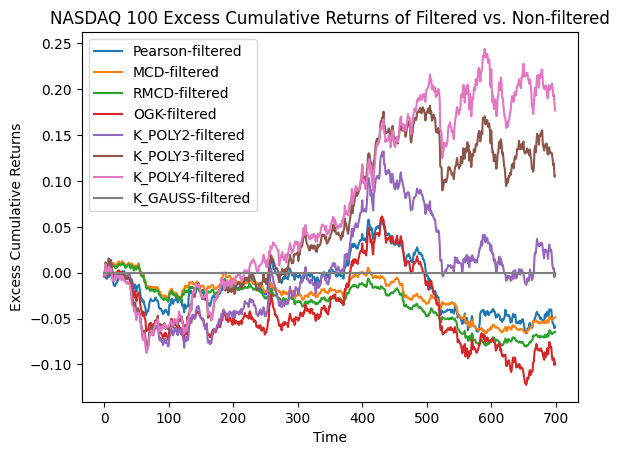

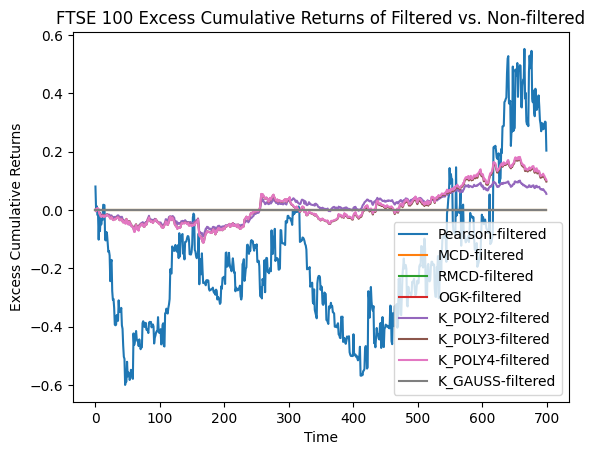

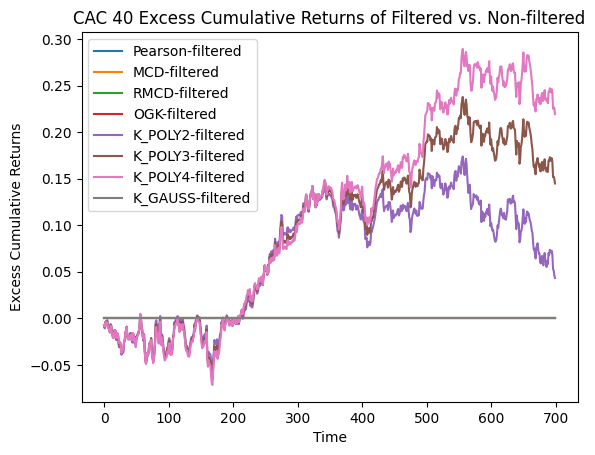

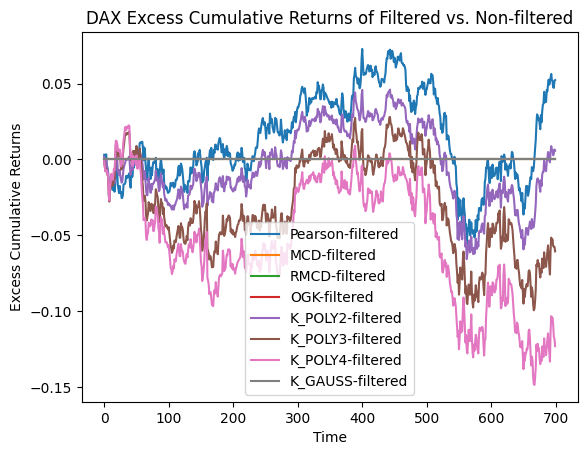

In [18]:
import matplotlib.pyplot as plt

for index in excess_cumulative_returns:
    pd.DataFrame(excess_cumulative_returns[index]).plot()
    plt.xlabel('Time')
    plt.ylabel('Excess Cumulative Returns')
    plt.title(index + ' Excess Cumulative Returns of Filtered vs. Non-filtered')
    plt.show()

We generally see the following discrepancies with the results presented in the paper, which can mainly be attributed to the lack of data for conducting experiments in our case. This is especially more visible from CAC 40 and DAX, indices for which we have very limited data, which exhibit more deviations from the results in the paper. 

(1) The number of non-noisy eigenvalues are extremely small, with the majority being 0 and few evaluating to 1 for NASDAQ 100 and FTSE 100.

(2) The p-values for both the Sharpe and Sortino ratio are mostly in an indeterminate area, indicating that we do not see statistically significant performance increase/decrease by adding noise-filtering.

(3) The proposed polynomial kernel covariance estimation method generally tends to outperform all other methods in terms of returns and Sharpe/Sortino ratios. The performances of the proposed Gaussian kernel and also the MCD methods are much less than expected from the paper.